# Week 4 goals:

1. Feature Engineering Update
2. Check Distribution inside each variable: normal/not normal/uniform
3. Select Features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('data.csv',sep='\t')

In [3]:
data['stress_score'] = data.apply(lambda row: row.Q1A + row.Q6A + row.Q8A + row.Q11A + row.Q12A + row.Q14A
                                       + row.Q18A + row.Q22A + row.Q27A + row.Q29A + row.Q32A + row.Q33A + row.Q35A + row.Q39A,
                                       axis=1)

In [4]:
data['stress_category'] = data["stress_score"]

In [5]:
data.loc[ data['stress_category'] <= 28, 'stress_category'] = 1
data.loc[(data['stress_category'] > 28) & (data['stress_category'] <= 32), 'stress_category'] = 2
data.loc[(data['stress_category'] > 32) & (data['stress_category'] <= 39), 'stress_category'] = 3
data.loc[(data['stress_category'] > 39) & (data['stress_category'] <= 47), 'stress_category'] = 4
data.loc[ data['stress_category'] > 47, 'stress_category'] = 5 

In [6]:
data['anxiety_score'] = data.apply(lambda row: row.Q2A + row.Q4A + row.Q7A + row.Q9A + row.Q15A + row.Q19A
                                       + row.Q20A + row.Q23A + row.Q25A + row.Q28A + row.Q30A + row.Q36A + row.Q40A + row.Q41A,
                                       axis=1)

In [7]:
data['anxiety_category'] = data['anxiety_score']

In [8]:
data.loc[ data['anxiety_category'] <= 21, 'anxiety_category'] = 1
data.loc[(data['anxiety_category'] > 21) & (data['anxiety_category'] <= 23), 'anxiety_category'] = 2
data.loc[(data['anxiety_category'] > 23) & (data['anxiety_category'] <= 28), 'anxiety_category'] = 3
data.loc[(data['anxiety_category'] > 28) & (data['anxiety_category'] <= 33), 'anxiety_category'] = 4
data.loc[ data['anxiety_category'] > 33, 'anxiety_category'] = 5 

In [9]:
data['depression_score'] = data.apply(lambda row: row.Q3A + row.Q5A + row.Q10A + row.Q13A + row.Q16A + row.Q17A
                                       + row.Q21A + row.Q24A + row.Q26A + row.Q31A + row.Q34A + row.Q37A + row.Q38A + row.Q42A,
                                       axis=1)

In [10]:
data['depression_category'] = data['depression_score']

In [11]:
data.loc[ data['depression_category'] <= 23, 'depression_category'] = 1
data.loc[(data['depression_category'] > 23) & (data['depression_category'] <= 27), 'depression_category'] = 2
data.loc[(data['depression_category'] > 27) & (data['depression_category'] <= 34), 'depression_category'] = 3
data.loc[(data['depression_category'] > 34) & (data['depression_category'] <= 41), 'depression_category'] = 4
data.loc[ data['depression_category'] > 41, 'depression_category'] = 5 

In [12]:
data['Extroversion'] = data.apply(lambda row: row.TIPI1 + 
                                  (7-row.TIPI6), axis=1)

In [13]:
data['Agreeableness'] = data.apply(lambda row: row.TIPI7 + 
                                   (7-row.TIPI2), axis=1)

In [14]:
data['Conscientiousness'] = data.apply(lambda row: row.TIPI3 + 
                                       (7-row.TIPI8), axis=1)

In [15]:
data['Emotional_stability'] = data.apply(lambda row: row.TIPI9 + 
                                         (7-row.TIPI4), axis=1)

In [16]:
data['Openness_to_experience'] = data.apply(lambda row: row.TIPI5 + 
                                            (7-row.TIPI10), axis=1)

## 1. Feature Engineering Update

Keep all the basic Feature Engineering from Week 3. Update with "unknown" for demographic variables.

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

In [18]:
data = data[data.TIPI1 != 0]
data = data[data.TIPI2 != 0]
data = data[data.TIPI3 != 0]
data = data[data.TIPI4 != 0]
data = data[data.TIPI5 != 0]
data = data[data.TIPI6 != 0]
data = data[data.TIPI7 != 0]
data = data[data.TIPI8 != 0]
data = data[data.TIPI9 != 0]
data = data[data.TIPI10 != 0]

In [19]:
data['depression_score'] = data['depression_score']-14
data['anxiety_score'] = data['anxiety_score']-14
data['stress_score'] = data['stress_score']-14

In [20]:
data.loc[data['religion']==5,'religion'] = 4
data.loc[data['religion']==6,'religion'] = 4
data.loc[data['religion']==7,'religion'] = 4

In [21]:
data = data[data.VCL6 != 1]
data = data[data.VCL9 != 1]
data = data[data.VCL12 != 1]

In [22]:
data['education_yrs'] = data['education']

In [23]:
data.loc[data['education_yrs'] == 1,'education_yrs'] = 8
data.loc[data['education_yrs'] == 2,'education_yrs'] = 12
data.loc[data['education_yrs'] == 3,'education_yrs'] = 16
data.loc[data['education_yrs'] == 4,'education_yrs'] = 19

In [24]:
data.loc[data['age']==1996,'age'] = 22
data.loc[data['age']==1998,'age'] = 20
data.loc[data['age']==1993,'age'] = 25
data.loc[data['age']==1991,'age'] = 27

data = data[data.age != 223]
data = data[data.age != 115]
data = data[data.age != 117]

In [25]:
data = data[data.familysize <= 30]

In [26]:
data.shape

(33270, 184)

In [27]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,anxiety_score,anxiety_category,depression_score,depression_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs
0,4,28,3890,4,25,2122,2,16,1944,4,...,34,5,27,4,1,9,9,1,13,12
1,4,2,8118,1,36,2890,2,35,4777,3,...,17,4,24,4,9,9,4,1,7,12
2,3,7,5784,1,33,4373,4,41,3242,1,...,12,3,39,5,3,7,4,8,10,12
3,2,23,5081,3,11,6837,2,37,5521,1,...,17,4,16,3,4,12,13,9,12,8
4,2,36,3215,2,13,7731,3,5,4156,4,...,40,5,32,5,4,7,4,4,9,16


Remove `unknown` demographic datas.

In [28]:
data.shape

(33270, 184)

In [29]:
data = data[data.education != 0]

In [30]:
data.shape

(32870, 184)

In [31]:
data = data[data.urban != 0]

In [32]:
data = data[data.gender != 0]
data = data[data.gender != 3]

In [33]:
data = data[data.hand != 0]

In [34]:
data = data[data.religion != 0]

In [35]:
data = data[data.orientation != 0]
data = data[data.orientation != 5]

In [36]:
data = data[data.race != 70]

In [37]:
data = data[data.married != 0]

In [38]:
data = data[data.familysize != 0]

In [39]:
data.shape

(23150, 184)

## 2. Check Distribution inside Each Variables

***Main Purpose***: Check the distribution for all the numerical datas, including:
* age
* family size
* education years
* stress/anxiety/depression scores
* TIPI scores (Personality)

In [40]:
np.array(data.columns)

array(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E',
       'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E',
       'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E',
       'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I',
       'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A',
       'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E',
       'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I',
       'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A',
       'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E',
       'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I',
       'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A',
       'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E',
       'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I',
       'Q36E', 'Q37A', 'Q37I', 'Q37E', 'Q38A', 'Q38I', 'Q38E', 'Q39A',
       'Q

Text(0.5, 1.0, 'Age Distribution')

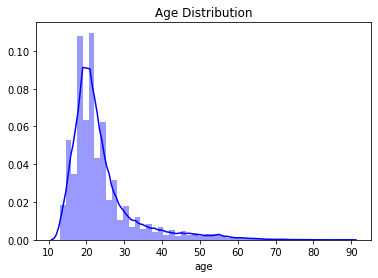

In [41]:
ax = sns.distplot(data.age, color="b")
ax.set_title("Age Distribution")

In [42]:
data["age"].describe()

count    23150.000000
mean        23.814903
std          8.783784
min         13.000000
25%         19.000000
50%         21.000000
75%         26.000000
max         89.000000
Name: age, dtype: float64

In [43]:
ss = StandardScaler()

In [44]:
data['age_norm'] = ss.fit_transform(data[['age']])

Text(0.5, 1.0, 'Family Size Distribution')

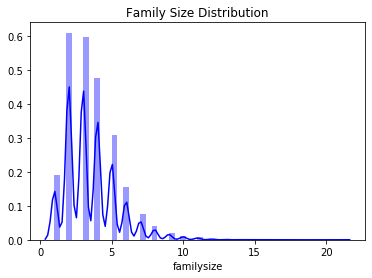

In [45]:
ax = sns.distplot(data.familysize, color="b")
ax.set_title("Family Size Distribution")

In [46]:
data["familysize"].describe()

count    23150.000000
mean         3.555724
std          1.818491
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         21.000000
Name: familysize, dtype: float64

Text(0.5, 1.0, 'Yrs of Education Received Distribution')

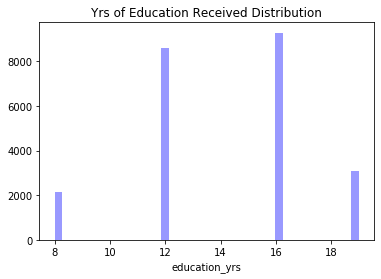

In [47]:
ax = sns.distplot(data.education_yrs, kde=False,color="b")
ax.set_title("Yrs of Education Received Distribution")

In [48]:
data["education_yrs"].describe()

count    23150.000000
mean        14.169503
std          3.125321
min          8.000000
25%         12.000000
50%         16.000000
75%         16.000000
max         19.000000
Name: education_yrs, dtype: float64

Text(0.5, 1.0, 'Stress Score Distribution')

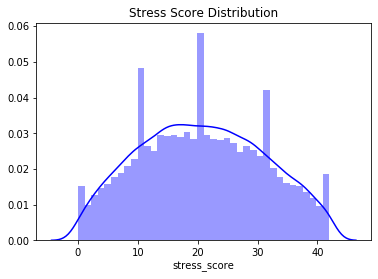

In [49]:
ax = sns.distplot(data.stress_score, color="b")
ax.set_title("Stress Score Distribution")

In [50]:
data["stress_score"].describe()

count    23150.000000
mean        20.711836
std         10.377668
min          0.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         42.000000
Name: stress_score, dtype: float64

Text(0.5, 1.0, 'Anxiety Score Distribution')

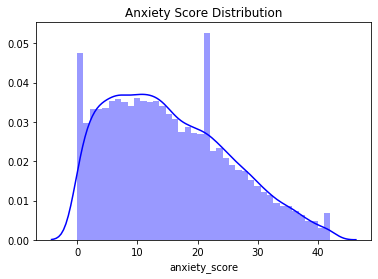

In [51]:
ax = sns.distplot(data.anxiety_score, color="b")
ax.set_title("Anxiety Score Distribution")

In [52]:
data["anxiety_score"].describe()

count    23150.000000
mean        15.343585
std          9.950344
min          0.000000
25%          7.000000
50%         14.000000
75%         22.000000
max         42.000000
Name: anxiety_score, dtype: float64

Text(0.5, 1.0, 'Depression Score Distribution')

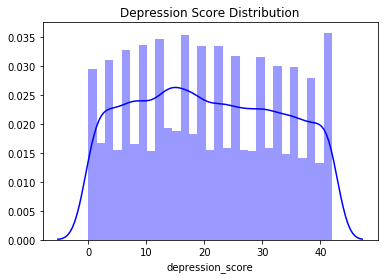

In [53]:
ax = sns.distplot(data.depression_score, color="b")
ax.set_title("Depression Score Distribution")

In [54]:
data["depression_score"].describe()

count    23150.000000
mean        20.696501
std         12.246185
min          0.000000
25%         10.000000
50%         20.000000
75%         31.000000
max         42.000000
Name: depression_score, dtype: float64

Text(0.5, 1.0, 'Extroversion Score Distribution')

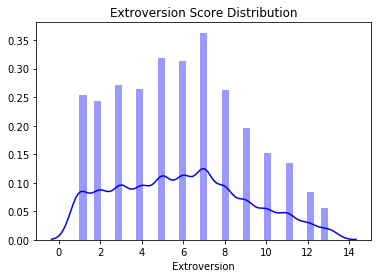

In [55]:
ax = sns.distplot(data.Extroversion, color="b")
ax.set_title("Extroversion Score Distribution")

In [56]:
data["Extroversion"].describe()

count    23150.000000
mean         5.916501
std          3.143449
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         13.000000
Name: Extroversion, dtype: float64

Text(0.5, 1.0, 'Agreeableness Score Distribution')

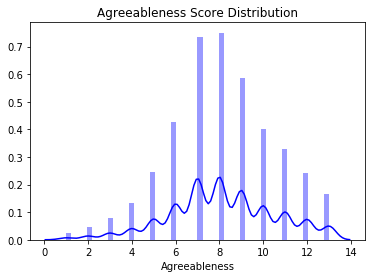

In [57]:
ax = sns.distplot(data.Agreeableness, color="b")
ax.set_title("Agreeableness Score Distribution")

In [58]:
data["Agreeableness"].describe()

count    23150.000000
mean         8.114816
std          2.433555
min          1.000000
25%          7.000000
50%          8.000000
75%         10.000000
max         13.000000
Name: Agreeableness, dtype: float64

Text(0.5, 1.0, 'Conscientiousness Score Distribution')

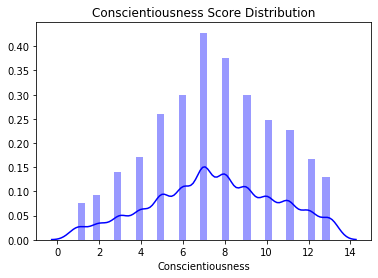

In [59]:
ax = sns.distplot(data.Conscientiousness, color="b")
ax.set_title("Conscientiousness Score Distribution")

In [60]:
data["Conscientiousness"].describe()

count    23150.000000
mean         7.488251
std          2.973585
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         13.000000
Name: Conscientiousness, dtype: float64

Text(0.5, 1.0, 'Emotional Stability Score Distribution')

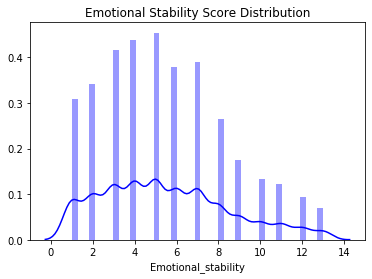

In [61]:
ax = sns.distplot(data.Emotional_stability, color="b")
ax.set_title("Emotional Stability Score Distribution")

In [62]:
data["Emotional_stability"].describe()

count    23150.000000
mean         5.486048
std          3.041330
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         13.000000
Name: Emotional_stability, dtype: float64

Text(0.5, 1.0, 'Openness to Experience Score Distribution')

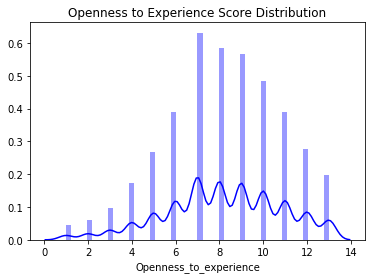

In [63]:
ax = sns.distplot(data.Openness_to_experience, color="b")
ax.set_title("Openness to Experience Score Distribution")

In [64]:
data["Openness_to_experience"].describe()

count    23150.000000
mean         8.178056
std          2.660008
min          1.000000
25%          7.000000
50%          8.000000
75%         10.000000
max         13.000000
Name: Openness_to_experience, dtype: float64

## 3. Feature Selection

***Potential Ideas (Feature):***
* sexual orientation (heterosexual vs. LGBTQ)
* personality
* age
* gender
* family size
* major -- STEM vs. arts 

***Potential Ideas (Models):***
* multiple regression
* random forest

In [65]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,anxiety_category,depression_score,depression_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs,age_norm
0,4,28,3890,4,25,2122,2,16,1944,4,...,5,27,4,1,9,9,1,13,12,-0.889716
2,3,7,5784,1,33,4373,4,41,3242,1,...,3,39,5,3,7,4,8,10,12,-0.775867
4,2,36,3215,2,13,7731,3,5,4156,4,...,5,32,5,4,7,4,4,9,16,-0.548170
6,1,20,4325,1,34,4009,2,38,3604,3,...,4,31,5,7,8,10,7,5,12,-0.775867
9,3,38,5187,2,28,2600,4,9,2015,1,...,5,42,5,1,1,10,1,5,8,-0.662019


### (i) Sexual Orientation

In [66]:
data["orientation"].unique()

array([1, 3, 2, 4])

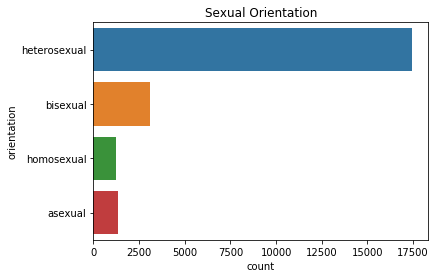

In [67]:
ax = sns.countplot(y='orientation', data=data)
ax.set_yticklabels(["heterosexual","bisexual","homosexual","asexual"])
ax.set_title('Sexual Orientation')
plt.show()

In [68]:
data.loc[data['orientation'] >= 2, 'orientation'] = 2

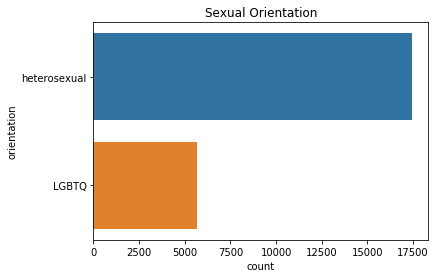

In [69]:
ax = sns.countplot(y='orientation', data=data)
ax.set_yticklabels(["heterosexual", "LGBTQ"])
ax.set_title('Sexual Orientation')
plt.show()

In [70]:
dummy_orientation = pd.get_dummies(data["orientation"])

In [71]:
data = pd.concat([data,dummy_orientation], axis=1)
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,depression_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs,age_norm,1,2
0,4,28,3890,4,25,2122,2,16,1944,4,...,4,1,9,9,1,13,12,-0.889716,1,0
2,3,7,5784,1,33,4373,4,41,3242,1,...,5,3,7,4,8,10,12,-0.775867,0,1
4,2,36,3215,2,13,7731,3,5,4156,4,...,5,4,7,4,4,9,16,-0.548170,1,0
6,1,20,4325,1,34,4009,2,38,3604,3,...,5,7,8,10,7,5,12,-0.775867,0,1
9,3,38,5187,2,28,2600,4,9,2015,1,...,5,1,1,10,1,5,8,-0.662019,0,1


In [72]:
data = data.rename(columns={1:"heterosexual",2:"LGBTQ"})

In [73]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,depression_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs,age_norm,heterosexual,LGBTQ
0,4,28,3890,4,25,2122,2,16,1944,4,...,4,1,9,9,1,13,12,-0.889716,1,0
2,3,7,5784,1,33,4373,4,41,3242,1,...,5,3,7,4,8,10,12,-0.775867,0,1
4,2,36,3215,2,13,7731,3,5,4156,4,...,5,4,7,4,4,9,16,-0.548170,1,0
6,1,20,4325,1,34,4009,2,38,3604,3,...,5,7,8,10,7,5,12,-0.775867,0,1
9,3,38,5187,2,28,2600,4,9,2015,1,...,5,1,1,10,1,5,8,-0.662019,0,1


In [74]:
np.array(data.columns)

array(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E',
       'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E',
       'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E',
       'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I',
       'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A',
       'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E',
       'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I',
       'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A',
       'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E',
       'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I',
       'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A',
       'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E',
       'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I',
       'Q36E', 'Q37A', 'Q37I', 'Q37E', 'Q38A', 'Q38I', 'Q38E', 'Q39A',
       'Q

In [75]:
df = data.copy()

In [76]:
df = df[['education', 'urban', 'gender', 'age','religion','race',
       'married', 'familysize', 'major', 'stress_score',
       'anxiety_score', 'depression_score', 'depression_category',
         'anxiety_category','stress_category','Extroversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_stability',
       'Openness_to_experience', 'education_yrs', 'heterosexual', 'LGBTQ', 'age_norm']]

In [77]:
df.head()

,education,urban,gender,age,religion,race,married,familysize,major,stress_score,...,stress_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs,heterosexual,LGBTQ,age_norm
0,2,3,2,16,12,10,1,2,NaN,40,...,5,1,9,9,1,13,12,1,0,-0.889716
2,2,3,2,17,4,60,1,3,NaN,17,...,2,3,7,4,8,10,12,0,1,-0.775867
4,3,2,2,19,10,10,1,4,Psychology,29,...,4,4,7,4,4,9,16,1,0,-0.548170
6,2,3,2,17,4,60,1,4,Mechatronics engeenerieng,14,...,1,7,8,10,7,5,12,0,1,-0.775867
9,1,1,2,18,2,60,1,3,computer programming,34,...,5,1,1,10,1,5,8,0,1,-0.662019


In [78]:
df.shape

(23150, 24)

### (ii) Major

* `.strip()` removes leading and ending spaces.
* `.split()` removes duplicate spaces in the middle of 2 words.

In [79]:
df["major"].nunique()

3692

In [80]:
df['major'] = df['major'].str.strip()

In [81]:
df["major"].nunique()

3208

In [82]:
df['major'] = df['major'].str.lower()

In [83]:
df["major"].nunique()

2420

In [84]:
df.head()

,education,urban,gender,age,religion,race,married,familysize,major,stress_score,...,stress_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs,heterosexual,LGBTQ,age_norm
0,2,3,2,16,12,10,1,2,NaN,40,...,5,1,9,9,1,13,12,1,0,-0.889716
2,2,3,2,17,4,60,1,3,NaN,17,...,2,3,7,4,8,10,12,0,1,-0.775867
4,3,2,2,19,10,10,1,4,psychology,29,...,4,4,7,4,4,9,16,1,0,-0.548170
6,2,3,2,17,4,60,1,4,mechatronics engeenerieng,14,...,1,7,8,10,7,5,12,0,1,-0.775867
9,1,1,2,18,2,60,1,3,computer programming,34,...,5,1,1,10,1,5,8,0,1,-0.662019


In [85]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['major'] = df['major'].str.replace(char, '')

In [86]:
df['major'] = df['major'].str.replace('  ', ' ')

In [87]:
df["major"].nunique()

2391

In [88]:
list_major = list(df["major"].unique())

In [89]:
print(list_major)

[nan, 'psychology', 'mechatronics engeenerieng', 'computer programming', 'art', 'criminal justice sociology', 'computer science', 'business', 'civil engineering', 'hospitality', 'statistics', 'biologyst', 'biology', 'education', 'architecture', 'computer science engineering', 'psychologyphilosophy', 'marketing', 'medical technology', 'nutrition', 'classics and philosophy', 'english', 'accounting', 'literature', 'microbiology', 'sociology', 't', 'undecided', 'professional writing', 'nursing', 'philosophy', 'italianhistory of art', 'telecom', 'medicine', 'geography', 'theatre', 'logistics', 'food science', 'history', 'real estate', 'it', 'criminal justice', 'communication', 'educationcommunity studies', 'marketing computer science', 'general engineering', 'science', 'librarianship', 'mechanical engineering', 'biochemistry and cell biology', 'pharmacy', 'international relations', 'economics', 'public relations', 'physics', 'engineering', 'law', 'fine arts', 'economy', 'medical', 'maths co

### (iii) Gender

In [90]:
dummy_gender = pd.get_dummies(df["gender"])

In [91]:
df = pd.concat([df,dummy_gender], axis=1)

In [92]:
df = df.rename(columns={1:"Male",2:"Female"})

In [93]:
df.head()

,education,urban,gender,age,religion,race,married,familysize,major,stress_score,...,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs,heterosexual,LGBTQ,age_norm,Male,Female
0,2,3,2,16,12,10,1,2,NaN,40,...,9,9,1,13,12,1,0,-0.889716,0,1
2,2,3,2,17,4,60,1,3,NaN,17,...,7,4,8,10,12,0,1,-0.775867,0,1
4,3,2,2,19,10,10,1,4,psychology,29,...,7,4,4,9,16,1,0,-0.548170,0,1
6,2,3,2,17,4,60,1,4,mechatronics engeenerieng,14,...,8,10,7,5,12,0,1,-0.775867,0,1
9,1,1,2,18,2,60,1,3,computer programming,34,...,1,10,1,5,8,0,1,-0.662019,0,1


In [94]:
df.drop('gender',axis=1,inplace=True)

In [95]:
df.head()

,education,urban,age,religion,race,married,familysize,major,stress_score,anxiety_score,...,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs,heterosexual,LGBTQ,age_norm,Male,Female
0,2,3,16,12,10,1,2,NaN,40,34,...,9,9,1,13,12,1,0,-0.889716,0,1
2,2,3,17,4,60,1,3,NaN,17,12,...,7,4,8,10,12,0,1,-0.775867,0,1
4,3,2,19,10,10,1,4,psychology,29,40,...,7,4,4,9,16,1,0,-0.548170,0,1
6,2,3,17,4,60,1,4,mechatronics engeenerieng,14,19,...,8,10,7,5,12,0,1,-0.775867,0,1
9,1,1,18,2,60,1,3,computer programming,34,28,...,1,10,1,5,8,0,1,-0.662019,0,1


In [96]:
df.drop('major',axis=1,inplace=True)

In [97]:
df.shape

(23150, 24)

## Basic Machine Learning Algorithms

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

## Select Features for Prediction

* education vs. education_yrs
* orientation
* age
* religion
* race
* family size
* personality

***Methods:***

* Linear Regression (Single/Multiple)
* Random Forest: contributioon

### (i) Personality

In [99]:
df_p = df.copy()

In [100]:
df_p.head()

,education,urban,age,religion,race,married,familysize,stress_score,anxiety_score,depression_score,...,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs,heterosexual,LGBTQ,age_norm,Male,Female
0,2,3,16,12,10,1,2,40,34,27,...,9,9,1,13,12,1,0,-0.889716,0,1
2,2,3,17,4,60,1,3,17,12,39,...,7,4,8,10,12,0,1,-0.775867,0,1
4,3,2,19,10,10,1,4,29,40,32,...,7,4,4,9,16,1,0,-0.548170,0,1
6,2,3,17,4,60,1,4,14,19,31,...,8,10,7,5,12,0,1,-0.775867,0,1
9,1,1,18,2,60,1,3,34,28,42,...,1,10,1,5,8,0,1,-0.662019,0,1


In [101]:
df_p.columns

Index(['education', 'urban', 'age', 'religion', 'race', 'married',
       'familysize', 'stress_score', 'anxiety_score', 'depression_score',
       'depression_category', 'anxiety_category', 'stress_category',
       'Extroversion', 'Agreeableness', 'Conscientiousness',
       'Emotional_stability', 'Openness_to_experience', 'education_yrs',
       'heterosexual', 'LGBTQ', 'age_norm', 'Male', 'Female'],
      dtype='object')

#### Depression

In [217]:
X_train,X_test,y_train,y_test = train_test_split(df_p[['Extroversion', 'Agreeableness', 'Conscientiousness',
                                                       'Emotional_stability', 'Openness_to_experience']],
                                                df_p['depression_category'],
                                                test_size = 0.3)

In [103]:
lin_reg = LinearRegression()

In [104]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
y_pred = lin_reg.predict(X_test)

In [106]:
mean_squared_error(y_test,y_pred)

1.652972934072689

In [107]:
r2_score(y_test,y_pred)

0.3177479236716264

In [108]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.086150
Agreeableness,-0.020526
Conscientiousness,-0.071936
Emotional_stability,-0.215798
Openness_to_experience,-0.029077


In [109]:
def1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
def1.head()

,Actual,Predicted
12786,3,3.559193
13973,3,4.004287
12728,5,4.004195
17941,5,3.318005
11736,3,3.047452


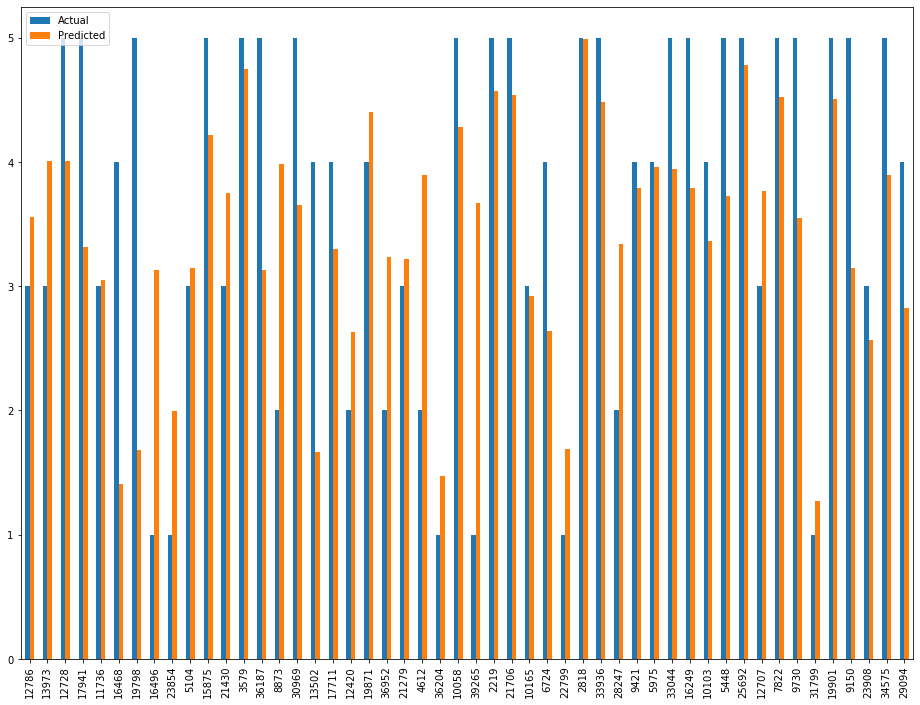

In [110]:
def11 = def1.head(50)
def11.plot(kind='bar',figsize=(16,12))

In [225]:
rf = RandomForestRegressor()

In [226]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [227]:
y_pred2 = rf.predict(X_test)

In [228]:
mean_squared_error(y_pred2,y_test)

1.9534135938744925

In [229]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.31
Variable: Agreeableness        Importance: 0.18
Variable: Openness_to_experience Importance: 0.18
Variable: Conscientiousness    Importance: 0.17
Variable: Extroversion         Importance: 0.16


#### Anxiety

In [230]:
X_train,X_test,y_train,y_test = train_test_split(df_p[['Extroversion', 'Agreeableness', 'Conscientiousness',
                                                       'Emotional_stability', 'Openness_to_experience']],
                                                df_p['anxiety_category'],
                                                test_size = 0.3)

In [118]:
lin_reg = LinearRegression()

In [119]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
y_pred = lin_reg.predict(X_test)

In [121]:
mean_squared_error(y_test,y_pred)

1.755768250040531

In [122]:
r2_score(y_test,y_pred)

0.3052424732706661

In [123]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.025410
Agreeableness,0.012928
Conscientiousness,-0.036400
Emotional_stability,-0.261172
Openness_to_experience,-0.030083


In [124]:
def1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
def1.head()

,Actual,Predicted
32426,5,3.367957
31646,5,3.786571
15015,3,3.291322
24346,3,3.757475
37712,1,3.339517


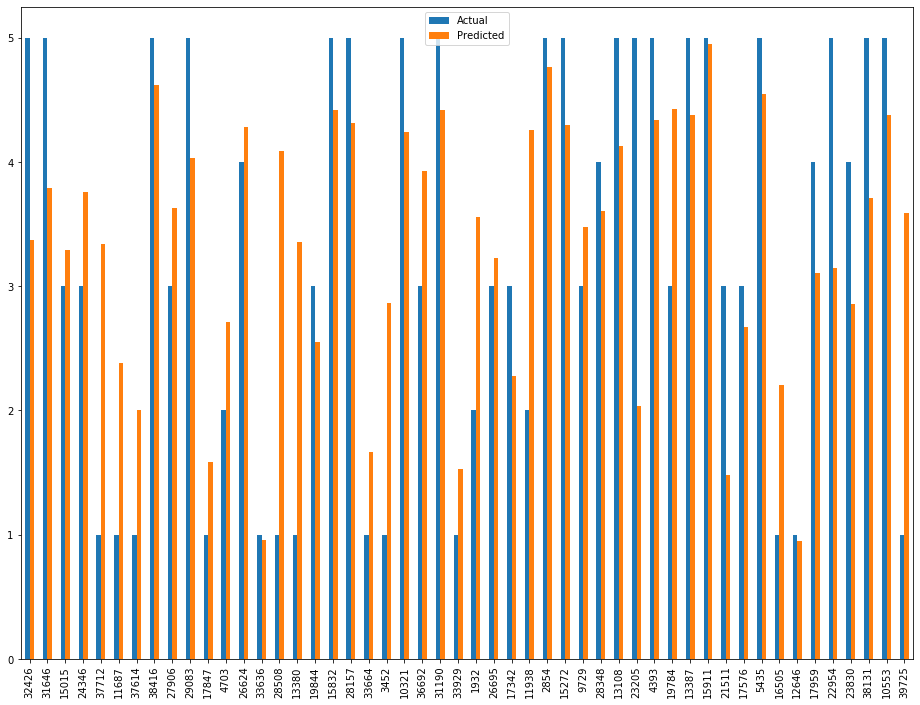

In [125]:
def11 = def1.head(50)
def11.plot(kind='bar',figsize=(16,12))

In [231]:
rf = RandomForestRegressor()

In [232]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [233]:
y_pred2 = rf.predict(X_test)

In [234]:
mean_squared_error(y_test,y_pred2)

2.124388759724034

In [235]:
r2_score(y_test,y_pred2)

0.17072921887772852

In [236]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.32
Variable: Extroversion         Importance: 0.17
Variable: Agreeableness        Importance: 0.17
Variable: Openness_to_experience Importance: 0.17
Variable: Conscientiousness    Importance: 0.16


#### Stress

In [237]:
X_train,X_test,y_train,y_test = train_test_split(df_p[['Extroversion', 'Agreeableness', 'Conscientiousness',
                                                       'Emotional_stability', 'Openness_to_experience']],
                                                df_p['stress_category'],
                                                test_size = 0.3)

In [133]:
lin_reg = LinearRegression()

In [134]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
y_pred = lin_reg.predict(X_test)

In [136]:
mean_squared_error(y_test,y_pred)

1.2186192706506591

In [137]:
r2_score(y_test,y_pred)

0.39308279975658134

In [138]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.017950
Agreeableness,-0.034603
Conscientiousness,-0.016205
Emotional_stability,-0.268807
Openness_to_experience,-0.015316


In [139]:
def1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
def1.head()

,Actual,Predicted
14715,4,3.710594
34131,1,2.915967
24282,1,1.946635
36152,2,2.574078
34612,5,2.932653


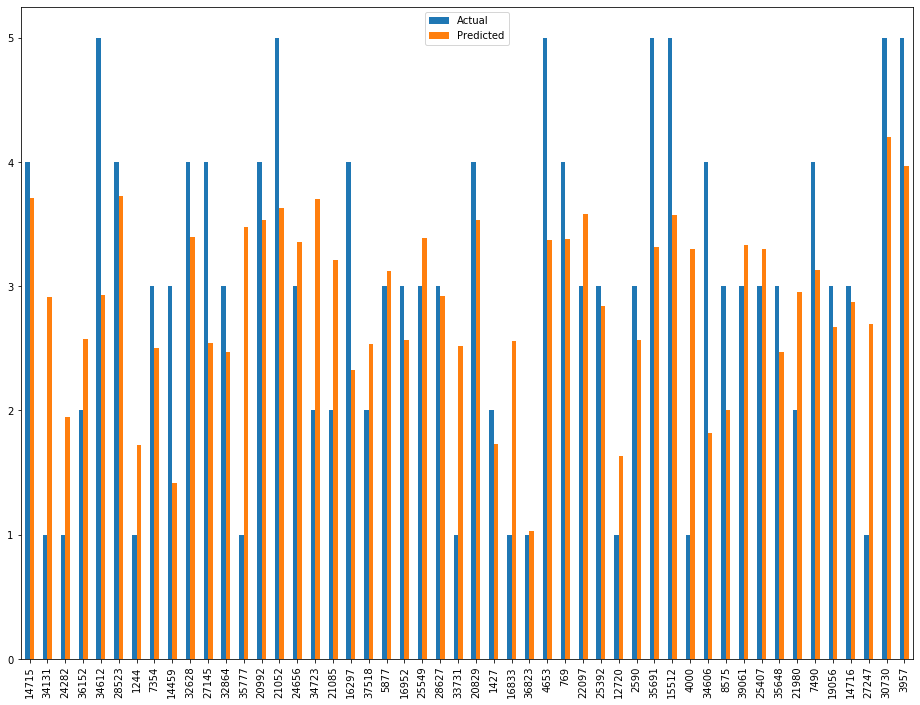

In [140]:
def11 = def1.head(50)
def11.plot(kind='bar',figsize=(16,12))

In [238]:
rf = RandomForestRegressor()

In [239]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [240]:
y_pred2 = rf.predict(X_test)

In [241]:
mean_squared_error(y_test,y_pred2)

1.4245781002614604

In [242]:
r2_score(y_test,y_pred2)

0.2844286967838884

In [243]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.42
Variable: Extroversion         Importance: 0.15
Variable: Conscientiousness    Importance: 0.15
Variable: Openness_to_experience Importance: 0.15
Variable: Agreeableness        Importance: 0.14


### (ii) Orientation + everything

In [147]:
df_o = df.copy()

In [148]:
df_o.head()

,education,urban,age,religion,race,married,familysize,stress_score,anxiety_score,depression_score,...,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,education_yrs,heterosexual,LGBTQ,age_norm,Male,Female
0,2,3,16,12,10,1,2,40,34,27,...,9,9,1,13,12,1,0,-0.889716,0,1
2,2,3,17,4,60,1,3,17,12,39,...,7,4,8,10,12,0,1,-0.775867,0,1
4,3,2,19,10,10,1,4,29,40,32,...,7,4,4,9,16,1,0,-0.548170,0,1
6,2,3,17,4,60,1,4,14,19,31,...,8,10,7,5,12,0,1,-0.775867,0,1
9,1,1,18,2,60,1,3,34,28,42,...,1,10,1,5,8,0,1,-0.662019,0,1


In [244]:
X_train,X_test,y_train,y_split = train_test_split(df_o[['age_norm',
                                                   'familysize','Extroversion', 'Agreeableness', 'Conscientiousness',
                                                   'Emotional_stability', 'Openness_to_experience', 'education_yrs',
                                                   'heterosexual', 'LGBTQ', 'Male', 'Female']],
                                                 df_o['depression_category'],
                                                 test_size=0.3)

In [150]:
lin_reg = LinearRegression()

In [151]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
y_pred = lin_reg.predict(X_test)

In [153]:
mean_squared_error(y_test,y_pred)

3.1259299063541914

In [154]:
r2_score(y_test,y_pred)

-0.5568280205422103

In [155]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
age_norm,-0.002960
familysize,-0.007126
Extroversion,-0.083518
Agreeableness,-0.021713
Conscientiousness,-0.067461
Emotional_stability,-0.214415
Openness_to_experience,-0.030079
education_yrs,-0.010905
heterosexual,-0.082552
LGBTQ,0.082552


In [156]:
def1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
def1.head()

,Actual,Predicted
14715,4,4.227098
34131,1,2.463955
24282,1,0.976858
36152,2,2.450684
34612,5,4.060879


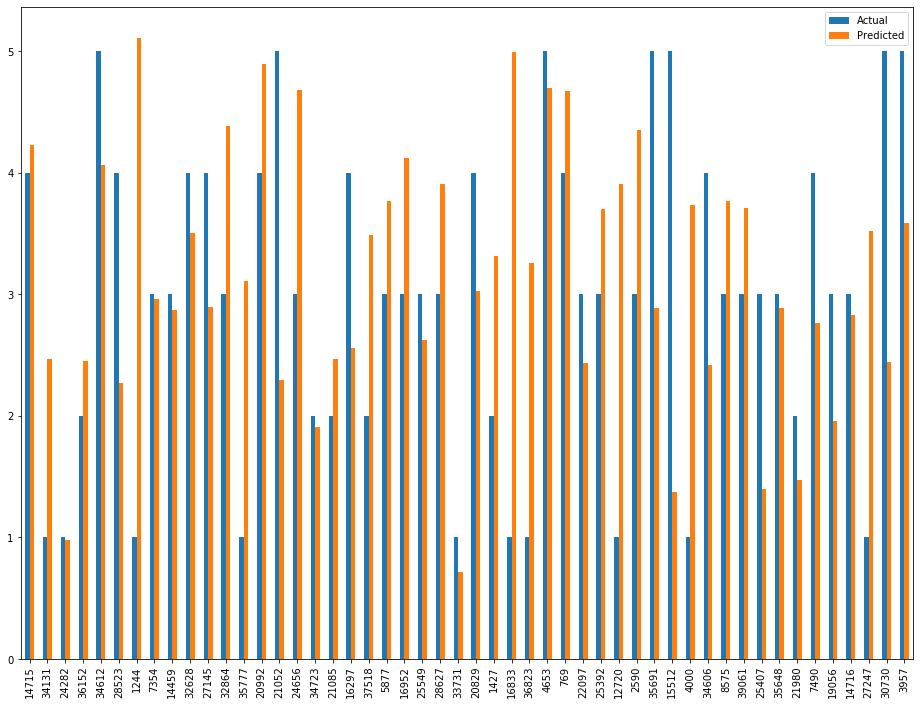

In [157]:
def11 = def1.head(50)
def11.plot(kind='bar',figsize=(16,12))

In [245]:
rf = RandomForestRegressor()

In [246]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [247]:
y_pred2 = rf.predict(X_test)

In [248]:
mean_squared_error(y_pred2,y_test)

3.0472372205330513

In [249]:
r2_score(y_pred2,y_test)

-2.7535770545993152

In [250]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.29
Variable: age_norm             Importance: 0.14
Variable: Extroversion         Importance: 0.11
Variable: Agreeableness        Importance: 0.1
Variable: Conscientiousness    Importance: 0.1
Variable: Openness_to_experience Importance: 0.1
Variable: familysize           Importance: 0.08
Variable: education_yrs        Importance: 0.04
Variable: heterosexual         Importance: 0.01
Variable: LGBTQ                Importance: 0.01
Variable: Male                 Importance: 0.01
Variable: Female               Importance: 0.01


### (iii) age, orientation, familysize, and gender

In [164]:
df_aof = df.copy()

In [165]:
X_train,X_test,y_train,y_test = train_test_split(df_aof[['age','LGBTQ','heterosexual','familysize','Male','Female']],
                                                df_aof['depression_category'],
                                                test_size=0.3)

In [166]:
lin_reg = LinearRegression()

In [167]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
y_pred = lin_reg.predict(X_test)

In [169]:
mean_squared_error(y_test,y_pred)

2.335943132795389

In [170]:
r2_score(y_test,y_pred)

0.02128988624582384

In [171]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
age,-0.017532
LGBTQ,0.164217
heterosexual,-0.164217
familysize,-0.044276
Male,-0.028508
Female,0.028508


In [172]:
def1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
def1.head()

,Actual,Predicted
21103,5,3.337695
31688,3,3.319190
35441,3,3.068057
37455,5,3.327511
4752,5,3.422344


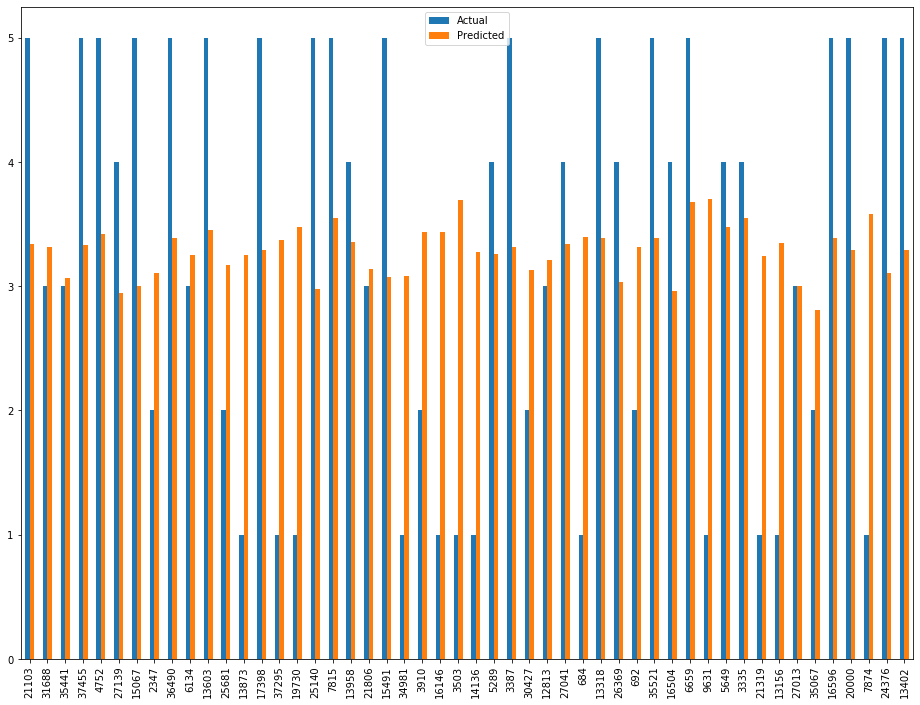

In [173]:
def11 = def1.head(50)
def11.plot(kind='bar',figsize=(16,12))

In [174]:
rf = RandomForestClassifier()

In [175]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
y_pred2 = rf.predict(X_test)

In [177]:
mean_squared_error(y_test,y_pred2)

5.1858891288696904

In [178]:
r2_score(y_test,y_pred2)

-1.1727764122232056

In [179]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.68
Variable: familysize           Importance: 0.28
Variable: heterosexual         Importance: 0.02
Variable: LGBTQ                Importance: 0.01
Variable: Male                 Importance: 0.01
Variable: Female               Importance: 0.01


### (iv) Orientation + Personality

In [180]:
df_op = df.copy()

In [181]:
X_train,X_test,y_train,y_test = train_test_split(df_op[['heterosexual','LGBTQ','Extroversion', 
                                                        'Agreeableness', 'Conscientiousness',
                                                   'Emotional_stability', 'Openness_to_experience']],
                                                df_op['depression_category'],
                                                test_size=0.3)

In [182]:
lin_reg = LinearRegression()

In [183]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
y_pred = lin_reg.predict(X_test)

In [185]:
mean_squared_error(y_test,y_pred)

1.6599700719794654

In [186]:
r2_score(y_test,y_pred)

0.31541839968605634

In [187]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
heterosexual,-0.078450
LGBTQ,0.078450
Extroversion,-0.084990
Agreeableness,-0.028706
Conscientiousness,-0.068428
Emotional_stability,-0.216561
Openness_to_experience,-0.024922


In [188]:
def1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
def1.head()

,Actual,Predicted
1136,3,3.764288
6883,2,3.452123
33581,3,3.201354
22230,4,3.345545
39353,5,4.729960


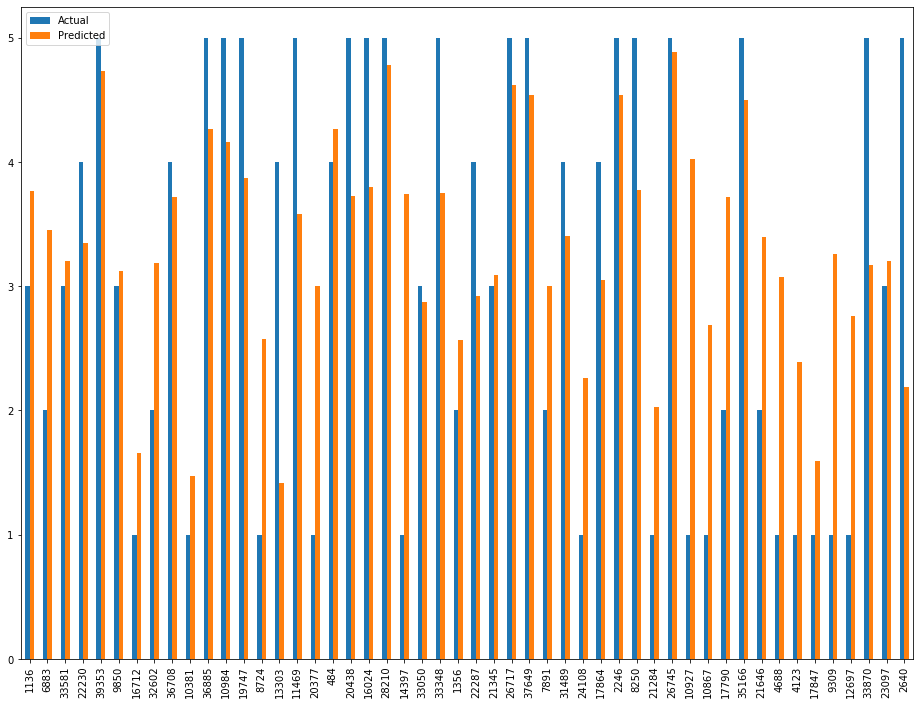

In [189]:
def11 = def1.head(50)
def11.plot(kind='bar',figsize=(16,12))

In [190]:
rf = RandomForestClassifier()

In [191]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [192]:
y_pred2 = rf.predict(X_test)

In [193]:
mean_squared_error(y_test,y_pred2)

2.957811375089993

In [194]:
r2_score(y_test,y_pred2)

-0.2198191273239667

In [195]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Agreeableness        Importance: 0.2
Variable: Emotional_stability  Importance: 0.2
Variable: Openness_to_experience Importance: 0.2
Variable: Conscientiousness    Importance: 0.19
Variable: Extroversion         Importance: 0.18
Variable: heterosexual         Importance: 0.01
Variable: LGBTQ                Importance: 0.01


### (v) Orientation + Personality + Gender 

In [196]:
df_agop = df.copy()

In [197]:
X_train,X_test,y_train,y_test = train_test_split(df_agop[['heterosexual','LGBTQ','Extroversion', 
                                                        'Agreeableness', 'Conscientiousness',
                                                   'Emotional_stability', 'Openness_to_experience',
                                                         'Male','Female']],
                                                df_agop['depression_category'],
                                                test_size=0.3)

In [198]:
lin_reg = LinearRegression()

In [199]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
y_pred = lin_reg.predict(X_test)

In [201]:
mean_squared_error(y_test,y_pred)

1.6565083446264033

In [202]:
r2_score(y_test,y_pred)

0.3127324518126485

In [203]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
heterosexual,-0.081440
LGBTQ,0.081440
Extroversion,-0.086860
Agreeableness,-0.025077
Conscientiousness,-0.066763
Emotional_stability,-0.216624
Openness_to_experience,-0.029304
Male,0.026051
Female,-0.026051


In [204]:
def1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
def1.head()

,Actual,Predicted
22761,4,3.993015
26223,1,1.451226
25146,4,3.758733
25538,1,2.512880
1659,5,3.532850


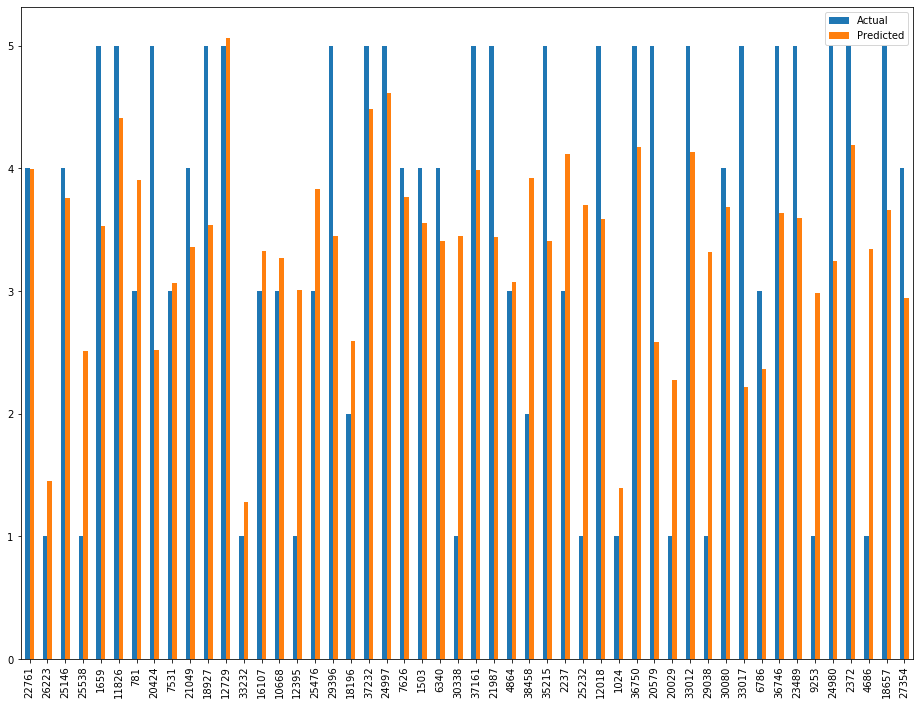

In [205]:
def11 = def1.head(50)
def11.plot(kind='bar',figsize=(16,12))

In [206]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [207]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [208]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [209]:
best_rf = rf_random.best_estimator_

In [210]:
best_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [211]:
y_pred2 = best_rf.predict(X_test)

In [212]:
mean_squared_error(y_test,y_pred2)

3.0175665946724264

In [213]:
r2_score(y_test,y_pred2)

-0.25195602046924814

In [214]:
# Get numerical feature importances
importances = list(best_rf.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.43
Variable: Extroversion         Importance: 0.16
Variable: Conscientiousness    Importance: 0.14
Variable: Openness_to_experience Importance: 0.11
Variable: Agreeableness        Importance: 0.09
Variable: Male                 Importance: 0.02
Variable: Female               Importance: 0.02
Variable: heterosexual         Importance: 0.01
Variable: LGBTQ                Importance: 0.01
